In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

from utils import gen_data

In [2]:
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)

In [4]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


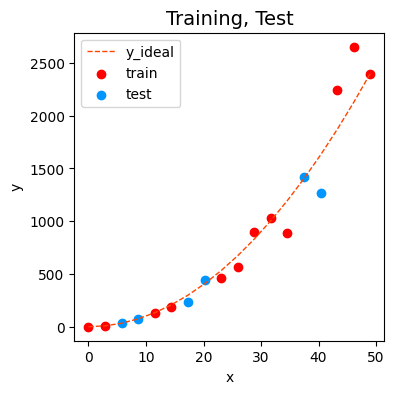

In [6]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--",color="orangered", label="y_ideal",lw=1)
ax.set_title("Training, Test", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color='#0096ff', label='test')
ax.legend(loc='upper left')
plt.show()